# EDA

Although bits and pieces are here and there, I'll formally do some more here. At the least, this will be a convenient place to get visuals ready for the presentation:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('../data/cleaned_02_ii.csv')
print(df.shape)
df.head()

(39565, 60)


,platform,text,hate_speech_score,target_race_asian,target_race_black,target_race_latinx,target_race_middle_eastern,target_race_native_american,target_race_pacific_islander,target_race_white,...,target_disability_neurological,target_disability_visually_impaired,target_disability_hearing_impaired,target_disability_unspecific,target_disability_other,target_disability,hate_rank,capital_sentance,cleaned_text,wc_cleaned_text
0,0,White people are trash.,0.46,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,white peopl are trash,4
1,0,"You've caught the big gay, it's known to be ai...",0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,you ve caught the big gay it s known to be air...,14
2,0,"I'm not saying you said that, I'm just saying ...",-1.29,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,i m not say you said that i m just say that if...,75
3,0,Donald Trump. Yeet myself off a building onto ...,-0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,donald trump yeet myself off a build onto a ga...,20
4,0,Fabrice Fabrice is ostensibly black or black/l...,-2.84,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,fabric fabric is ostens black or black latino ...,19


In [3]:
df['hate_speech_score'].describe()

count    39565.000000
mean        -0.943911
std          2.073087
min         -8.340000
25%         -2.330000
50%         -0.700000
75%          0.570000
max          6.300000
Name: hate_speech_score, dtype: float64

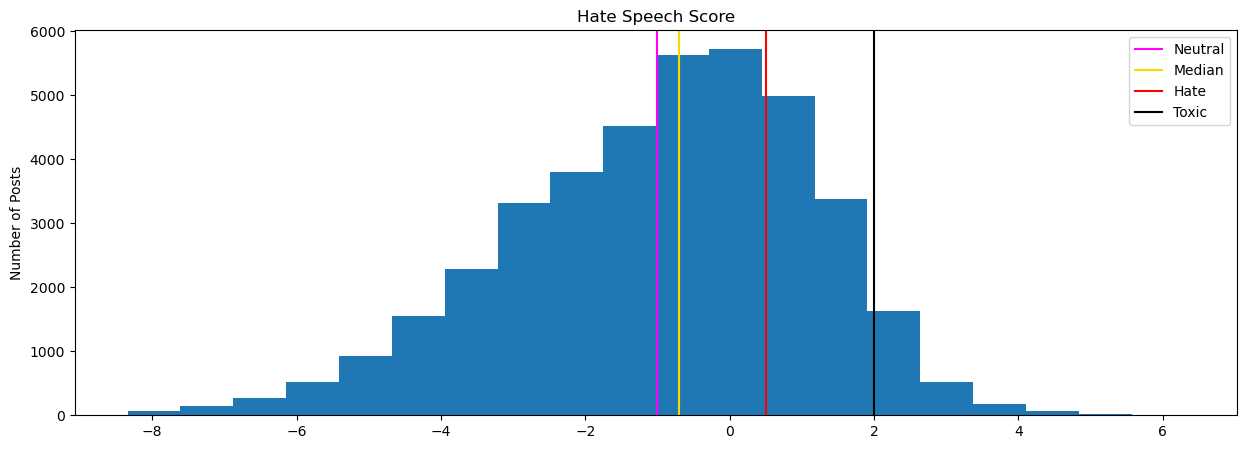

In [4]:
plt.figure(figsize = (15, 5))
plt.hist(df['hate_speech_score'], bins = 20)

plt.axvline(x=-1, color = 'magenta', label='Neutral')
plt.axvline(x=-.7, color = 'gold', label='Median')
plt.axvline(x=.5, color = 'red', label='Hate')
plt.axvline(x=2, color = 'black', label='Toxic')
plt.legend()
plt.ylabel("Number of Posts")
plt.title("Hate Speech Score");

In [5]:
targets = list(df.columns[df.columns.str.contains("target")])
print(len(targets))
targets[:5]

53


['target_race_asian',
 'target_race_black',
 'target_race_latinx',
 'target_race_middle_eastern',
 'target_race_native_american']

In [6]:
target_df = [] #Preparing a dataframe to examine the various 'target' hate speech distributions.
for i in targets:
    #print(f"{i}:")
    #print(df.loc[(df['hate_rank']!=0) & (df[i]>0),'hate_speech_score'].describe())
    target_df.append(df.loc[(df['hate_rank']!=0) & (df[i]>0),'hate_speech_score'].describe())
    #print('~'*45)

# target_df

In [7]:
#Out of interest in also seeing the overall != and == 0 we'll add those as well:
targets.append('target_1plus') #Oh, could have just utilized the list we'll make momentarily. Oh well.
targets.append('target_0')
target_df.append(df.loc[(df['hate_rank']!=0),'hate_speech_score'].describe())
target_df.append(df.loc[(df['hate_rank']==0),'hate_speech_score'].describe())

In [8]:
try_df = pd.DataFrame(target_df)
try_df['target'] = [i[7:] for i in targets] #Eh, gets the job done.
try_df.set_index('target', inplace=True)
try_df['count_n'] = round(try_df['count']/10354, 3) #Hmm, let's add a normalization:
try_df.tail()

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
disability_unspecific,186.0,1.519570,0.728330,0.51,0.9225,1.425,1.9475,4.40,0.018
disability_other,88.0,1.524205,0.703104,0.55,1.0200,1.450,1.8200,3.42,0.008
disability,649.0,1.500293,0.753337,0.51,0.9000,1.400,1.9300,5.13,0.063
1plus,10354.0,1.457094,0.773561,0.51,0.8700,1.300,1.8500,6.30,1.000
0,29211.0,-1.794960,1.685597,-8.34,-2.8600,-1.460,-0.4300,0.50,2.821


In [9]:
cats = ['race','religion','origin','gender','sexuality','age','disability']
cats1 = ['1plus', '0']

In [10]:
try_df.loc[cats + cats1] #To formally clarify: It's evident from the categories that they are not mutually exclusive.

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
race,3836.0,1.480792,0.795623,0.51,0.88,1.30,1.8900,6.30,0.370
religion,1637.0,1.491625,0.815088,0.51,0.88,1.29,1.8900,6.30,0.158
origin,2370.0,1.478342,0.794170,0.51,0.87,1.31,1.8875,6.30,0.229
gender,4871.0,1.425024,0.740792,0.51,0.85,1.28,1.8100,6.05,0.470
sexuality,2579.0,1.482133,0.746033,0.51,0.91,1.35,1.9000,6.09,0.249
age,357.0,1.461765,0.789327,0.51,0.83,1.31,1.9100,4.91,0.034
disability,649.0,1.500293,0.753337,0.51,0.90,1.40,1.9300,5.13,0.063
1plus,10354.0,1.457094,0.773561,0.51,0.87,1.30,1.8500,6.30,1.000
0,29211.0,-1.794960,1.685597,-8.34,-2.86,-1.46,-0.4300,0.50,2.821


We'll explore a few individual ones, but to comment (note that this is again for hate speech in general - ie anything above a .5).:

Plurality is actually on gender. Perhaps because it's the most in-your-face. However, they a;; are about the same. Of interest though is despite gender being the most frequently hated on, it's also the relatively least hated on, being the only group below the mean (categorically).

Of interest aso is how disability is actually the highest. Interesting. I wonder if it's just regarding insults and the like. Ie at least with any other group it's potentially understandable to make fun of them IN THE SENSE that they have full control of their limbs and abilities. However, why make fun of a person that can't hear - they can't! Why make fun of a person that can't articulate themselves as well as others - they can't! Ie it's a much more clearly defined logical-reality barrier that makes me surprised that this is the highest. Interesting.

Finally, and unsurprising to my 'domain knowledge', notice the consistently left skewed on every single one (save the 0s for the opposite reason). Ie likely even within what Berkely calls 'hate speech' there's still the 'lighter ones' as opposed to the real toxic ones. A nice retroactive support to our original problem statement to multi-categorize them.

In [11]:
try_df[try_df['mean']==try_df['mean'].max()] #Oh, this is quite a shocker that the NAs really getting pounded....

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
race_native_american,257.0,1.661245,0.860369,0.51,1.03,1.47,2.14,5.14,0.025


In [12]:
#Now that we added the 0 and 1+ category need to reference it like this:
try_df[try_df['mean']==try_df['mean'].sort_values()[1]] #Not surprising the overall low hate, given the assumption that most of the people
#posting were probably Christian, even if all of these are from people of other religions, that the overall hate would
#probably be less as the Christians are likely a significant majority of the population.

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
religion_christian,442.0,1.336244,0.702379,0.51,0.81,1.14,1.68,4.68,0.043


In [13]:
#NOTE, by the way, that the count_n is going off of the entire group; hence any individual slice... So too below.

try_df[try_df.index.str.contains('religion')] #Oh wow, in this sample Jews actually aren't the most hated on... Unsurprised
#about the Chrstians (see earlier). However, those Eastern religions are up there... Now, they aren't the highest counts, but stll...
#Of note as well is how Muslims are ovr half the targets. Also of note is considering the global populatio of Jews how
#much more they get targeted proportionally...
    #Oh, notice the explicit overlap... ie add up the Abrahamic religions and you're already over the target's count...
        #Hence, these posts have overlaps. Regardless...
        
#Quite unsure why Hindus are overall hated the most. Sonyah sugguested a few things revolving around contempoaryish events
#there which could be (recall that this. Regardless...

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
religion_atheist,132.0,1.430758,0.720145,0.51,0.8300,1.230,1.7825,3.91,0.013
religion_buddhist,130.0,1.514615,0.752224,0.51,0.9025,1.345,1.9300,3.91,0.013
religion_christian,442.0,1.336244,0.702379,0.51,0.8100,1.140,1.6800,4.68,0.043
religion_hindu,189.0,1.570317,0.788465,0.51,0.9900,1.380,2.1400,4.33,0.018
religion_jewish,471.0,1.532442,0.834226,0.51,0.8700,1.380,1.9300,5.09,0.045
religion_mormon,134.0,1.435672,0.709711,0.51,0.8225,1.270,1.7975,3.91,0.013
religion_muslim,897.0,1.522564,0.815932,0.51,0.9000,1.330,1.9400,6.30,0.087
religion_other,300.0,1.492433,0.851464,0.51,0.8275,1.265,1.9325,5.42,0.029
religion,1637.0,1.491625,0.815088,0.51,0.8800,1.290,1.8900,6.30,0.158


## Focus on Toxic Hate Speech:

In [14]:
#Prepping for the 2 focus. Arguably could have done this differently, but eh...
targets.pop()
targets.pop()

'target_1plus'

In [15]:
#I'll redo above just focusing on 2s:
try_df2 = []
for i in targets:
    try_df2.append(df.loc[(df['hate_rank']==2) & (df[i]>0),'hate_speech_score'].describe())

In [16]:
targets.append('target_2')
targets.append('target_1')
targets.append('target_0')
targets.append('target_1below') #Likely not needed, but eh
try_df2.append(df.loc[(df['hate_rank']==2),'hate_speech_score'].describe())
try_df2.append(df.loc[(df['hate_rank']==1),'hate_speech_score'].describe())
try_df2.append(df.loc[(df['hate_rank']==0),'hate_speech_score'].describe())
try_df2.append(df.loc[(df['hate_rank']!=2),'hate_speech_score'].describe())

In [17]:
try_df2 = pd.DataFrame(try_df2)
try_df2['target'] = [i[7:] for i in targets]
try_df2.set_index('target', inplace=True)
try_df2['count_n'] = round(try_df2['count']/2086, 3)
try_df2.tail()

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
disability,137.0,2.634307,0.617099,2.01,2.19,2.38,2.91,5.13,0.066
2,2086.0,2.668552,0.667251,2.01,2.20,2.45,2.91,6.30,1.000
1,8268.0,1.151445,0.416344,0.51,0.79,1.10,1.48,2.00,3.964
0,29211.0,-1.794960,1.685597,-8.34,-2.86,-1.46,-0.43,0.50,14.003
1below,37479.0,-1.144973,1.935292,-8.34,-2.43,-0.84,0.36,2.00,17.967


In [18]:
cats2 = ['2', '1', '0', '1below']

In [19]:
try_df2.loc[cats + cats2]

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
race,802.0,2.705212,0.687918,2.01,2.22,2.47,2.950,6.30,0.384
religion,340.0,2.763824,0.699808,2.01,2.26,2.53,3.115,6.30,0.163
origin,488.0,2.711086,0.681568,2.01,2.21,2.50,2.980,6.30,0.234
gender,929.0,2.617513,0.625841,2.01,2.18,2.42,2.840,6.05,0.445
sexuality,544.0,2.605478,0.611257,2.01,2.18,2.38,2.840,6.09,0.261
age,80.0,2.638125,0.605603,2.03,2.22,2.42,2.860,4.91,0.038
disability,137.0,2.634307,0.617099,2.01,2.19,2.38,2.910,5.13,0.066
2,2086.0,2.668552,0.667251,2.01,2.20,2.45,2.910,6.30,1.000
1,8268.0,1.151445,0.416344,0.51,0.79,1.10,1.480,2.00,3.964


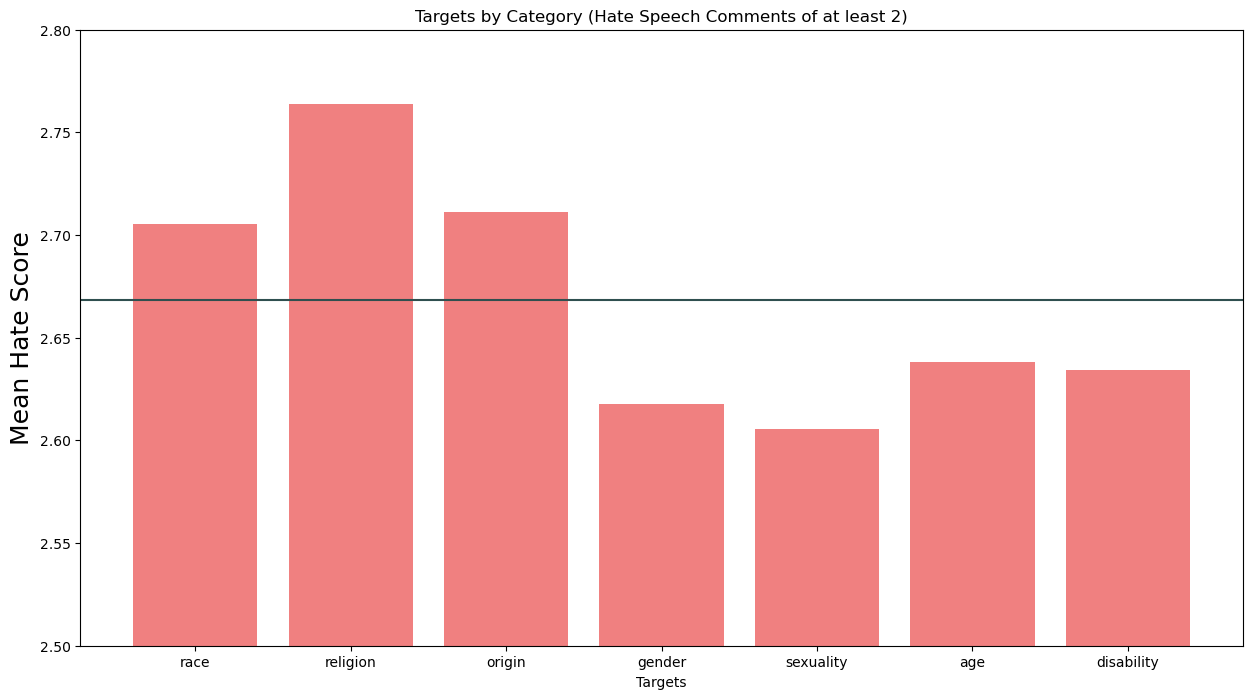

In [53]:
plt.figure(figsize = (15, 8))
plt.bar(try_df2.loc[cats]['mean'].index, try_df2.loc[cats]['mean'], color='lightcoral')
plt.ylim(2.5, 2.8)
plt.axhline(y=2.668552, color = 'darkslategray')

plt.xlabel("Targets")
plt.ylabel("Mean Hate Score", fontsize = 18)
plt.title("Targets by Category (Hate Speech Comments of at least 2)");

Now that we're at the high-end categories, it's unsurprising to me, via domain knowledge, that religion is the highest, followed by race and origin. Also, note the very low count for age... Also, now disability is only slightly above the average, with sexuality actually being the lowest.

Anyways, once again we see that the most targeted group is still gender.

In [22]:
try_df2[try_df2.index.str.contains('religion')] #Once again, on a count basis the Jews and the Muslims...
#And, unsurprisingly, the Jews, now focusing on the 'extreme' category are the highest. Muslims, however, are stll quite high
#and so too 'other'. Of interest also is the now 'higher' Christian rank (compared to before). Of special  interst is
#the quite low atheiest score, which I suppose I could imagine as pragmatically they don't have anything to believe in
#to poke holes in, unlike any other religion definitionally. Plus, notice their fewer count. Mormons also are quite low,
#surprisingly. Finally, in the extrme category Hindus, previously the most hated upon, tetter out.

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
religion_atheist,30.0,2.536667,0.443126,2.01,2.2700,2.380,2.6850,3.91,0.014
religion_buddhist,32.0,2.616250,0.412872,2.02,2.3475,2.540,2.7400,3.91,0.015
religion_christian,69.0,2.627246,0.575259,2.01,2.2000,2.480,2.7700,4.68,0.033
religion_hindu,51.0,2.657059,0.497057,2.02,2.3250,2.510,2.8450,4.33,0.024
religion_jewish,104.0,2.799519,0.655802,2.01,2.3150,2.605,3.2600,5.09,0.050
religion_mormon,28.0,2.562857,0.394094,2.02,2.3375,2.525,2.6750,3.91,0.013
religion_muslim,207.0,2.714396,0.678718,2.01,2.2450,2.490,2.9950,6.30,0.099
religion_other,70.0,2.758857,0.699701,2.01,2.2800,2.635,2.9375,5.42,0.034
religion,340.0,2.763824,0.699808,2.01,2.2600,2.530,3.1150,6.30,0.163


In [23]:
try_df2[try_df2.index.str.contains('race')] #A more popular topic than religion, likely because it's more tangible.
#And yeah, much more evenlydistributed here, which is interesting considering how many more counts there are ; eh
#perhaps that's already enough for the 'law of large numbers' to start spreading the love/hate evenly.

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
race_asian,112.0,2.699286,0.640468,2.01,2.2475,2.540,3.0100,5.14,0.054
race_black,338.0,2.668639,0.660095,2.01,2.2225,2.450,2.9000,5.53,0.162
race_latinx,161.0,2.723727,0.669972,2.01,2.2300,2.540,2.9600,5.14,0.077
race_middle_eastern,289.0,2.747232,0.728771,2.01,2.2500,2.490,3.0400,6.30,0.139
race_native_american,75.0,2.727333,0.709907,2.01,2.2400,2.540,2.9550,5.14,0.036
race_pacific_islander,58.0,2.701379,0.667815,2.01,2.2550,2.495,2.9075,5.14,0.028
race_white,170.0,2.657706,0.665298,2.01,2.2000,2.430,2.8100,5.09,0.081
race_other,159.0,2.735220,0.668774,2.01,2.2750,2.530,2.9500,5.57,0.076
race,802.0,2.705212,0.687918,2.01,2.2200,2.470,2.9500,6.30,0.384


In [24]:
try_df2[try_df2.index.str.contains('origin')] #I don't appreciate this cohort enough to comment.

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
origin_immigrant,203.0,2.689507,0.671297,2.01,2.1850,2.48,2.985,6.30,0.097
origin_migrant_worker,89.0,2.840449,0.739003,2.01,2.3100,2.70,3.100,6.30,0.043
origin_specific_country,338.0,2.683846,0.630364,2.01,2.2125,2.50,2.945,5.57,0.162
origin_undocumented,142.0,2.747535,0.706744,2.01,2.2100,2.55,3.055,6.30,0.068
origin_other,103.0,2.772233,0.684340,2.01,2.2700,2.58,3.005,5.57,0.049
origin,488.0,2.711086,0.681568,2.01,2.2100,2.50,2.980,6.30,0.234


In [25]:
try_df2[try_df2.index.str.contains('gender')] #Perhaps the term 'cis' didn't pickup. Regardless:
#Yeah.... woman are the clear winners/losers here. Once again, the hate is pretty evenly spread out.

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
gender_men,248.0,2.595605,0.607983,2.01,2.1600,2.395,2.8250,6.01,0.119
gender_non_binary,50.0,2.595400,0.575323,2.01,2.2025,2.395,2.7725,4.91,0.024
gender_transgender_men,89.0,2.621124,0.525829,2.01,2.2400,2.420,2.9200,4.87,0.043
gender_transgender_unspecified,64.0,2.634062,0.582201,2.01,2.2075,2.405,2.9200,4.87,0.031
gender_transgender_women,67.0,2.573433,0.558425,2.01,2.1500,2.390,2.7550,4.91,0.032
gender_women,731.0,2.615841,0.627028,2.01,2.1900,2.420,2.8300,6.05,0.350
gender_other,39.0,2.620513,0.561398,2.02,2.1450,2.440,2.8200,4.01,0.019
gender,929.0,2.617513,0.625841,2.01,2.1800,2.420,2.8400,6.05,0.445


In [26]:
try_df2[try_df2.index.str.contains('sexuality')]#Unsurprisigly the majority class, straight, is the lowest and 'other' is the highest,
#being the most foreign. Ie given the majority are attracted to the opposite it can be understod the relative
#lower hate as even their interests aren't inherently abnormal - just atypical for, say a man to lik a man - yet approximately
#half of the world likes men!
#Of interest though is th much highr lesbian hate than gay. Perhaps since they're also women (see above).

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
sexuality_bisexual,182.0,2.611923,0.551055,2.01,2.1725,2.440,2.9200,4.87,0.087
sexuality_gay,421.0,2.594371,0.597366,2.01,2.1800,2.380,2.8400,6.09,0.202
sexuality_lesbian,174.0,2.662069,0.618592,2.01,2.2125,2.480,2.9675,6.09,0.083
sexuality_straight,152.0,2.543421,0.538536,2.01,2.1600,2.335,2.8100,4.87,0.073
sexuality_other,66.0,2.763788,0.760380,2.02,2.1800,2.475,3.1250,5.78,0.032
sexuality,544.0,2.605478,0.611257,2.01,2.1800,2.380,2.8400,6.09,0.261


In [27]:
try_df2[try_df2.index.str.contains('age')] #Once again other.... and I'm also unsurprised that senios are lower as
#people are more willing to forgive somebody 'stuck in their ways' which the elderly classically and sterotypically are.

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
age_children,32.0,2.638750,0.583392,2.03,2.2175,2.46,2.7475,4.22,0.015
age_teenagers,41.0,2.601463,0.661939,2.03,2.1400,2.36,2.7300,4.91,0.020
age_young_adults,47.0,2.629362,0.546158,2.03,2.2300,2.42,2.9650,4.26,0.023
age_middle_aged,30.0,2.604667,0.495620,2.06,2.2625,2.42,2.7975,3.91,0.014
age_seniors,24.0,2.577917,0.452942,2.06,2.2550,2.42,2.7225,3.58,0.012
age_other,6.0,2.831667,0.663187,2.10,2.3475,2.83,3.0575,3.91,0.003
age,80.0,2.638125,0.605603,2.03,2.2200,2.42,2.8600,4.91,0.038


In [28]:
try_df2[try_df2.index.str.contains('disability')] #Particuarly puzzled here, but without going into the texts not to much to comment.
#However, cognitive is the clear dominant target. 

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
disability_physical,15.0,2.581333,0.404137,2.10,2.2600,2.480,2.8050,3.38,0.007
disability_cognitive,92.0,2.617609,0.635151,2.01,2.1875,2.360,2.8800,5.13,0.044
disability_neurological,30.0,2.641000,0.549522,2.02,2.2425,2.430,2.9175,3.98,0.014
disability_visually_impaired,9.0,2.525556,0.343297,2.10,2.2700,2.420,2.6900,3.16,0.004
disability_hearing_impaired,9.0,2.525556,0.343297,2.10,2.2700,2.420,2.6900,3.16,0.004
disability_unspecific,44.0,2.557273,0.514521,2.01,2.2475,2.385,2.6750,4.40,0.021
disability_other,20.0,2.566500,0.476238,2.02,2.1850,2.365,2.9350,3.42,0.010
disability,137.0,2.634307,0.617099,2.01,2.1900,2.380,2.9100,5.13,0.066


In [29]:
try_df2[try_df2['mean']==try_df2['mean'].max()] #Hmm, and migrants get the most hate. Not the most common though so likely
#and sure enough yes - their standard deviation is quite high. Recall that the overall std for 2s were .67.

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
origin_migrant_worker,89.0,2.840449,0.739003,2.01,2.31,2.7,3.1,6.3,0.043


In [30]:
try_df2[try_df2['mean']==try_df2['mean'].sort_values()[3]] #Oh interesting, they'r tied for lowest. Missed that earlier.
#At any rate, eh, considering their low frequency I'm not so surprised, all else equal. Also, it would seem that both groups
#were included in the same comments.

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
disability_visually_impaired,9.0,2.525556,0.343297,2.1,2.27,2.42,2.69,3.16,0.004
disability_hearing_impaired,9.0,2.525556,0.343297,2.1,2.27,2.42,2.69,3.16,0.004


In [31]:
try_df[try_df.index.str.contains('disability')]#Hmm, even here they completly overlap. Eh, oh well.

,count,mean,std,min,25%,50%,75%,max,count_n
target,,,,,,,,,
disability_physical,93.0,1.452366,0.657841,0.52,0.8900,1.490,1.8500,3.38,0.009
disability_cognitive,434.0,1.509055,0.747910,0.51,0.9725,1.410,1.9375,5.13,0.042
disability_neurological,134.0,1.496866,0.778599,0.51,0.8500,1.450,1.9500,3.98,0.013
disability_visually_impaired,27.0,1.618889,0.767024,0.53,0.9050,1.560,2.2550,3.16,0.003
disability_hearing_impaired,27.0,1.620370,0.768743,0.53,0.9050,1.570,2.2550,3.16,0.003
disability_unspecific,186.0,1.519570,0.728330,0.51,0.9225,1.425,1.9475,4.40,0.018
disability_other,88.0,1.524205,0.703104,0.55,1.0200,1.450,1.8200,3.42,0.008
disability,649.0,1.500293,0.753337,0.51,0.9000,1.400,1.9300,5.13,0.063
